                     Feature  Importance
22                       GFR    0.118586
20           SerumCreatinine    0.095320
43                   Itching    0.047507
18         FastingBloodSugar    0.035487
23            ProteinInUrine    0.032457
42              MuscleCramps    0.029048
16                SystolicBP    0.026503
1                     Gender    0.026021
21                 BUNLevels    0.022428
8           PhysicalActivity    0.022036
30          CholesterolTotal    0.020471
35                 Diuretics    0.020027
19                     HbA1c    0.019909
33  CholesterolTriglycerides    0.019864
39                     Edema    0.019731


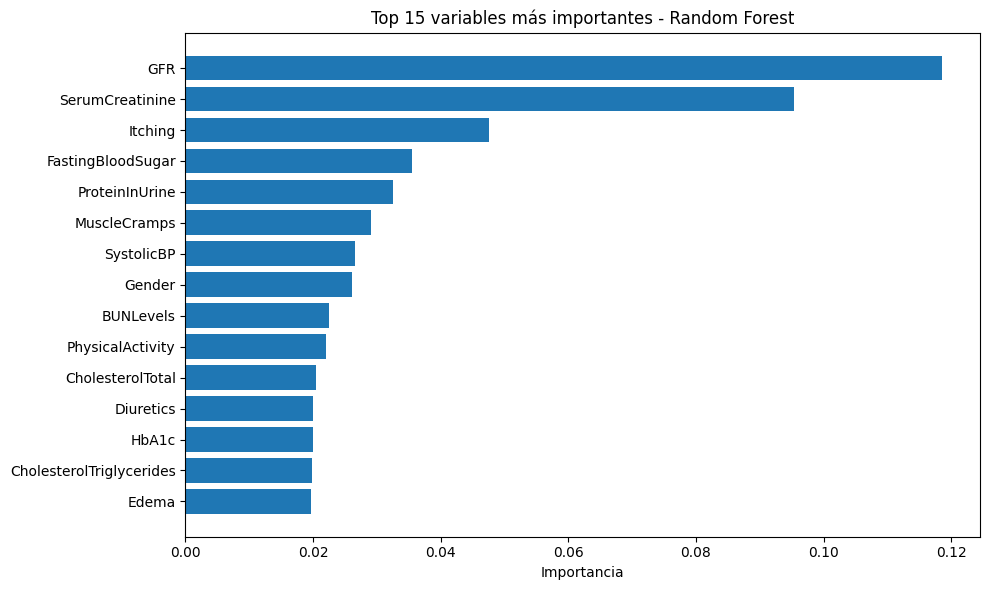

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Verifica que la columna 'Diagnosis' exista y no tenga valores nulos
assert 'Diagnosis' in df.columns, "La columna 'Diagnosis' no existe"
df = df.dropna(subset=['Diagnosis'])

# Convertir columnas categóricas a numéricas
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Separar variables independientes (X) y variable objetivo (y)
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
y = df['Diagnosis']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancia de las variables
importancias = rf.feature_importances_
features = X.columns

# Crear DataFrame de importancia
importance_df = pd.DataFrame({'Feature': features, 'Importance': importancias})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 15 más importantes
print(importance_df.head(15))

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel("Importancia")
plt.title("Top 15 variables más importantes - Random Forest")
plt.tight_layout()
plt.show()
